Capstone: Crypto Headlines as Predictors
--
Submitted by: Marvin <br>
Instructor: Yish Lim <br>
Date: May-June 2021

---

Context: A Need For Reliable Sentiment Analysis In A Fast Moving Crypto Market
--
Bitcoin and other cryptocurrencies represent a new asset class in the world, and with the rapid developments in the market investors need reliable methods for understanding the sentiment of others. Sentiment analysis has been leveraged by hedge funds and other institutional investors for the stock market (and adjacent areas) for some time now, and as well, sentiment analysis has been used within the crypto space.

The question for this project centers on publication headlines, the questions being:

- Can we predict crypto market price by analyzing and performing machine learning on publication headlines?

To be clear: it should be understood that previous work done in this area has shown that indeed there is no significant predictive power found in the analysis of headlines alone just yet, however, the goal is to begin -- and contribute -- to this area, understanding that going forward sentiment analysis is critical to a holistic investor approach to risk management.

To this end, a Venture Capital Firm has asked for this work to be done, as they are interested in exploring opportunities within the crypto space. Sentiment analysis rooted prediction is what they're looking for.

In [33]:
from newsfetch.google import google_search
import pandas as pd
from newsfetch.news import newspaper
import matplotlib.pyplot as plt
import seaborn as sns
from htmldate import find_date
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import json
import datetime

In [34]:
from nltk.tokenize import RegexpTokenizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samsung\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\samsung\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\samsung\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [237]:
from nltk.corpus import stopwords

In [36]:
link_dates = []
link_headlines = []

Pulling URLS based on "Bitcoin" Keyword:
--
To start, I need some links I can use to get headlines.

In [37]:
googlr_ccn = google_search('bitcoin', 'https://cryptocurrencynews.com/')

In [41]:
# googlr_bitcoinist = google_search('bitcoin', 'https://bitcoinist.com/')

In [38]:
googlr_cbrief = google_search('bitcoin', 'https://cryptobriefing.com/')

In [42]:
# googlr_money = google_search('bitcoin', 'https://money.com')

In [39]:
googlr_cdesk = google_search('bitcoin', 'https://coindesk.com')

Function for getting Headlines and Links from URLs:
--

In [43]:
def link_miner(links):
    
    link_dates.append([find_date(i) for i in links])
    link_headlines.append([newspaper(i).headline for i in links])

In [44]:
cbrief_urls = googlr_cbrief.urls
cdesk_urls = googlr_cdesk.urls
ccn_urls = googlr_ccn.urls

In [46]:
all_urls = cdesk_urls + ccn_urls + cbrief_urls

In [15]:
#all_urls

In [51]:
len(all_urls)

875

In [48]:
urls_df = pd.DataFrame(all_urls)

In [19]:
#urls_df

In [52]:
urls_df.to_csv(r'C:\Users\samsung\data-science-journey\Course Materials\Capstone\crypto-headlines-as-predictors\all_urls.csv'
               , index = False)

In [53]:
link_miner(all_urls)

encoding error: UTF-8 / UTF-8


In [54]:
len(link_dates[0])

875

In [55]:
len(link_headlines[0])

875

In [56]:
hdln_df = pd.DataFrame(link_headlines[0])

In [57]:
# export hdln_df
hdln_df.to_csv(r'C:\Users\samsung\data-science-journey\Course Materials\Capstone\crypto-headlines-as-predictors\hdln_df.csv'
               , index = False)

In [58]:
dates_df = pd.DataFrame(link_dates[0])

In [59]:
# export dates_df
dates_df.to_csv(r'C:\Users\samsung\data-science-journey\Course Materials\Capstone\crypto-headlines-as-predictors\dates_df.csv'
               , index = False)

In [60]:
df = pd.concat([hdln_df,dates_df], axis=1)

In [61]:
df

,0,0
0,BTC Price Index and Live Chart -- CoinDesk 20,2021-05-26
1,"CoinDesk: Bitcoin, Ethereum, Crypto News and P...",2021-05-26
2,Bitcoin Outflow From Exchanges Suggests Confid...,2021-05-26
3,BTC Price Index and Live Chart -- CoinDesk 20,2021-05-26
4,Hedge Fund Billionaire Ray Dalio: 'I Have Some...,2021-05-24
...,...,...
870,"Enjin Airdrops 50,000 NFTs via Social Media QR...",2021-05-26
871,Carl Icahn Archives,2021-05-01
872,arbitrum Archives,2021-05-01
873,Kevin O'Leary Archives,2021-05-01


Data Cleaning Process Begins Here:
--

- Separating columns due to column header issue
- Renaming columns
- Getting a step-one dataset ready

In [62]:
date_df = df.iloc[:,-1:]

In [73]:
date_df = date_df.rename(columns={ date_df.columns[0]: "date" })

In [74]:
date_df

,date
0,2021-05-26
1,2021-05-26
2,2021-05-26
3,2021-05-26
4,2021-05-24
...,...
870,2021-05-26
871,2021-05-01
872,2021-05-01
873,2021-05-01


In [65]:
headline_df = df.iloc[:,:1]

In [75]:
headline_df = headline_df.rename(columns={ headline_df.columns[0]: "headline" })

In [76]:
headline_df

,headline
0,BTC Price Index and Live Chart -- CoinDesk 20
1,"CoinDesk: Bitcoin, Ethereum, Crypto News and P..."
2,Bitcoin Outflow From Exchanges Suggests Confid...
3,BTC Price Index and Live Chart -- CoinDesk 20
4,Hedge Fund Billionaire Ray Dalio: 'I Have Some...
...,...
870,"Enjin Airdrops 50,000 NFTs via Social Media QR..."
871,Carl Icahn Archives
872,arbitrum Archives
873,Kevin O'Leary Archives


In [77]:
df2 = pd.concat([headline_df,dates_df], axis=1)

In [78]:
df2

,headline,0
0,BTC Price Index and Live Chart -- CoinDesk 20,2021-05-26
1,"CoinDesk: Bitcoin, Ethereum, Crypto News and P...",2021-05-26
2,Bitcoin Outflow From Exchanges Suggests Confid...,2021-05-26
3,BTC Price Index and Live Chart -- CoinDesk 20,2021-05-26
4,Hedge Fund Billionaire Ray Dalio: 'I Have Some...,2021-05-24
...,...,...
870,"Enjin Airdrops 50,000 NFTs via Social Media QR...",2021-05-26
871,Carl Icahn Archives,2021-05-01
872,arbitrum Archives,2021-05-01
873,Kevin O'Leary Archives,2021-05-01


In [79]:
df2 = df2.rename(columns={ df2.columns[1]: "date" })

In [80]:
df2

,headline,date
0,BTC Price Index and Live Chart -- CoinDesk 20,2021-05-26
1,"CoinDesk: Bitcoin, Ethereum, Crypto News and P...",2021-05-26
2,Bitcoin Outflow From Exchanges Suggests Confid...,2021-05-26
3,BTC Price Index and Live Chart -- CoinDesk 20,2021-05-26
4,Hedge Fund Billionaire Ray Dalio: 'I Have Some...,2021-05-24
...,...,...
870,"Enjin Airdrops 50,000 NFTs via Social Media QR...",2021-05-26
871,Carl Icahn Archives,2021-05-01
872,arbitrum Archives,2021-05-01
873,Kevin O'Leary Archives,2021-05-01


The Now-Kind-Of-Ready Dataset:
--
After doing some cleaning and adjusting, I've got the dataset the way I'd like it in order to move forward.

In [81]:
df2

,headline,date
0,BTC Price Index and Live Chart -- CoinDesk 20,2021-05-26
1,"CoinDesk: Bitcoin, Ethereum, Crypto News and P...",2021-05-26
2,Bitcoin Outflow From Exchanges Suggests Confid...,2021-05-26
3,BTC Price Index and Live Chart -- CoinDesk 20,2021-05-26
4,Hedge Fund Billionaire Ray Dalio: 'I Have Some...,2021-05-24
...,...,...
870,"Enjin Airdrops 50,000 NFTs via Social Media QR...",2021-05-26
871,Carl Icahn Archives,2021-05-01
872,arbitrum Archives,2021-05-01
873,Kevin O'Leary Archives,2021-05-01


In [82]:
df2.to_csv(r'C:\Users\samsung\data-science-journey\Course Materials\Capstone\crypto-headlines-as-predictors\df2.csv'
               , index = False)

In [83]:
hdlns_from_df2 = []

for i in df2['headline']:
    hdlns_from_df2.append(i)

EDA + Processing with NLP:
--
Now, I'll explore the headlines and attempt some pre-processing using NLP.

In [84]:
# Activating English stopwords to remove from headlines

stop_words=set(stopwords.words("english"))
#print(stop_words)

In [85]:
#making a copy of my DF to test with
df_testr = df2
df_testr

,headline,date
0,BTC Price Index and Live Chart -- CoinDesk 20,2021-05-26
1,"CoinDesk: Bitcoin, Ethereum, Crypto News and P...",2021-05-26
2,Bitcoin Outflow From Exchanges Suggests Confid...,2021-05-26
3,BTC Price Index and Live Chart -- CoinDesk 20,2021-05-26
4,Hedge Fund Billionaire Ray Dalio: 'I Have Some...,2021-05-24
...,...,...
870,"Enjin Airdrops 50,000 NFTs via Social Media QR...",2021-05-26
871,Carl Icahn Archives,2021-05-01
872,arbitrum Archives,2021-05-01
873,Kevin O'Leary Archives,2021-05-01


In [86]:
for col in df_testr.columns:
    print(col, df_testr[col].isnull().sum())

headline 0
date 0


In [87]:
# Creating new columns with stopwords removed and all lowercase

df_testr['step_one_process'] = df_testr['headline'].apply(lambda x: ' '.join([word.lower() for word in x.split() 
                                                                              if word.lower() not in stop_words and word.isalpha()]))
df_testr.head()

,headline,date,step_one_process
0,BTC Price Index and Live Chart -- CoinDesk 20,2021-05-26,btc price index live chart coindesk
1,"CoinDesk: Bitcoin, Ethereum, Crypto News and P...",2021-05-26,crypto news price data
2,Bitcoin Outflow From Exchanges Suggests Confid...,2021-05-26,bitcoin outflow exchanges suggests confidence ...
3,BTC Price Index and Live Chart -- CoinDesk 20,2021-05-26,btc price index live chart coindesk
4,Hedge Fund Billionaire Ray Dalio: 'I Have Some...,2021-05-24,hedge fund billionaire ray


In [88]:
df_testr = df_testr.rename(columns={'step_one_process': 'v2_headline'})

In [89]:
df_testr

,headline,date,v2_headline
0,BTC Price Index and Live Chart -- CoinDesk 20,2021-05-26,btc price index live chart coindesk
1,"CoinDesk: Bitcoin, Ethereum, Crypto News and P...",2021-05-26,crypto news price data
2,Bitcoin Outflow From Exchanges Suggests Confid...,2021-05-26,bitcoin outflow exchanges suggests confidence ...
3,BTC Price Index and Live Chart -- CoinDesk 20,2021-05-26,btc price index live chart coindesk
4,Hedge Fund Billionaire Ray Dalio: 'I Have Some...,2021-05-24,hedge fund billionaire ray
...,...,...,...
870,"Enjin Airdrops 50,000 NFTs via Social Media QR...",2021-05-26,enjin airdrops nfts via social media qr adverts
871,Carl Icahn Archives,2021-05-01,carl icahn archives
872,arbitrum Archives,2021-05-01,arbitrum archives
873,Kevin O'Leary Archives,2021-05-01,kevin archives


In [228]:
# be consistent on target variable -- price change
# what kind of dates are in your dataset?
# for each day, what is the price change? for each week, what is the price change?


# Do engineering of target variable
# STRETCH goal: use a count vectorizer on headline data

 Getting Crypto Market Data & Choosing Target Variable
 --
 Now, using CoinAPI I'll pull in some crypto market data for 3 coins that I'd like to analyze and consider for modeling.

In [90]:
pip install --upgrade coinapi_rest_v1

Note: you may need to restart the kernel to use updated packages.


In [91]:
from coinapi_rest_v1.restapi import CoinAPIv1
import datetime, sys
import requests
import config

In [237]:
# Example for getting historical data

# import requests

# url = 'https://rest.coinapi.io/v1/ohlcv/BITSTAMP_SPOT_BTC_USD/history?period_id=1MIN&time_start=2016-01-01T00:00:00'
# headers = {'X-CoinAPI-Key' : '73034021-THIS-IS-SAMPLE-KEY'}
# response = requests.get(url, headers=headers)

# url = 'https://rest.coinapi.io/v1/ohlcv/BTC/USD/history?period_id=1MIN&time_start=2016-01-01T00:00:00'
# headers = {'X-CoinAPI-Key' : '73034021-THIS-IS-SAMPLE-KEY'}
# response = requests.get(url, headers=headers)

In [92]:
url = 'https://rest.coinapi.io/v1/exchanges'
headers = {'X-CoinAPI-Key' : config.cr_apikey}
response = requests.get(url, headers=headers)

In [93]:
r1 = response.json()

In [94]:
def json_print(obj):
    txt = json.dumps(obj, sort_keys=True, indent=3)
    print(txt)

In [282]:
# json_print(r1)

Used Application To Get Crypto Market Data To Excel Sheet: Importing Here
--

Note: This is instead of using the API directly to notebook.

In [95]:
crypto_assets = pd.read_csv('crypto_market_data_coinapi_assets.csv')
crypto_assets.head()

,Asset Id,Name,Type Is Crypto,Data Start,Data End,Data Quote Start,Data Quote End,Data Orderbook Start,Data Orderbook End,Data Trade Start,Data Trade End,Data Symbols Count,Volume 1hrs Usd,Volume 1day Usd,Volume 1mth Usd,Id Icon,Price Usd
0,USD,US Dollar,0,2010-07-17,2021-05-20,2014-02-24T17:43:05.0000000Z,2021-05-20T18:09:52.4463220Z,2014-02-24T17:43:05.0000000Z,2020-08-05T14:38:00.7082850Z,2010-07-17T23:09:17.0000000Z,2021-05-20T18:00:04.1900000Z,58455,1.427854e+13,4.210092e+14,1.534980e+16,0a4185f2-1a03-4a7c-b866-ba7076d8c73b,NaN
1,BTC,Bitcoin,1,2010-07-17,2021-05-20,2014-02-24T17:43:05.0000000Z,2021-05-20T18:09:44.0210090Z,2014-02-24T17:43:05.0000000Z,2020-08-05T14:38:38.3413202Z,2010-07-17T23:09:17.0000000Z,2021-05-20T18:00:04.1900000Z,54460,3.964252e+14,1.367870e+16,1.176910e+18,4caf2b16-a017-4e26-a348-2cea69c34cba,39519.404340
2,PLN,Zloty,0,2011-04-05,2021-05-20,2017-08-29T15:47:10.0528025Z,2021-05-20T18:08:44.4550000Z,2017-08-29T15:47:10.0528025Z,2020-08-05T14:37:41.6530000Z,2011-04-05T18:49:48.0000000Z,2021-05-20T18:00:04.1900000Z,80,1.803883e+07,6.707664e+09,1.190773e+11,3f682b5b-77ec-4d8c-b612-b8ff3ac748f7,0.265804
3,EUR,Euro,0,2011-04-06,2021-05-20,2014-04-20T15:06:33.0000000Z,2021-05-20T18:09:54.6553960Z,2014-04-20T15:06:33.0000000Z,2020-08-05T14:38:06.5604509Z,2011-04-06T02:17:41.0000000Z,2021-05-20T18:00:04.1900000Z,1564,1.834678e+10,9.458773e+11,1.190438e+13,688fcf1c-92bb-4c84-ac95-0971e9bfed2f,1.218103
4,CNY,Yuan Renminbi,0,2011-06-13,2021-05-20,2015-02-11T16:50:54.6130000Z,2021-05-20T18:08:50.1874269Z,2015-02-11T16:50:54.6130000Z,2020-08-05T14:33:23.5273964Z,2011-06-13T05:13:24.0000000Z,2021-04-13T06:34:07.0000000Z,426,0.000000e+00,0.000000e+00,0.000000e+00,688fcf1c-92bb-4c84-ac95-0971e9bfed2f,0.155608


Why Litecoin???
--
I've chosen Litecoin market data for the following reasons:
- It's got a similar "age" to Bitcoin
- Given the above, there's been a similar amount of time for investors to speculate
- There is a (historical) relationship between Bitcoin and Litecoin (i.e. Lightning Network)
- Litecoin has not performed as well as Bitcoin, all in all
- I did not want to use Bitcoin market data at the outset of this 

In [96]:
ltc_series = pd.read_csv('crypto_market_data_coinapi_litecoin.csv')
ltc_series

,Time Period Start,Time Period End,Time Open,Time Close,Price Open,Price High,Price Low,Price Close,Volume Traded,Trades Count
0,2021-05-17T00:00:00.0000000Z,2021-05-24T00:00:00.0000000Z,2021-05-17T00:00:00.4170000Z,2021-05-20T19:26:00.9835440Z,296.19000,318.49000,125.00000,211.55000,7.116297e+06,1414318
1,2021-05-10T00:00:00.0000000Z,2021-05-17T00:00:00.0000000Z,2021-05-10T00:00:00.5817670Z,2021-05-16T23:59:59.9497670Z,388.13000,414.07000,279.15000,296.11000,8.343657e+06,2191022
2,2021-05-03T00:00:00.0000000Z,2021-05-10T00:00:00.0000000Z,2021-05-03T00:00:00.8712850Z,2021-05-09T23:59:59.9995420Z,269.10000,389.83000,268.64000,388.30000,9.357046e+06,2314644
3,2021-04-26T00:00:00.0000000Z,2021-05-03T00:00:00.0000000Z,2021-04-26T00:00:00.6632370Z,2021-05-02T23:59:59.0303550Z,224.25000,278.75000,221.25000,269.10000,4.087442e+06,920245
4,2021-04-19T00:00:00.0000000Z,2021-04-26T00:00:00.0000000Z,2021-04-19T00:00:00.0695620Z,2021-04-25T23:59:55.7200000Z,274.13000,289.84000,204.50000,224.13000,7.739379e+06,1479412
...,...,...,...,...,...,...,...,...,...,...
347,2014-06-30T00:00:00.0000000Z,2014-07-07T00:00:00.0000000Z,2014-06-30T02:52:12.3700000Z,2014-07-04T20:24:25.5170000Z,8.36573,9.14901,8.00000,8.00000,1.279163e+02,52
348,2014-06-23T00:00:00.0000000Z,2014-06-30T00:00:00.0000000Z,2014-06-23T08:41:27.6100000Z,2014-06-28T11:12:01.5330000Z,9.70001,9.99695,9.28651,9.60984,2.869111e+01,31
349,2014-06-16T00:00:00.0000000Z,2014-06-23T00:00:00.0000000Z,2014-06-16T07:38:28.3100000Z,2014-06-21T07:19:06.4430000Z,9.84337,10.00000,9.50000,9.54142,1.962269e+01,6
350,2014-06-09T00:00:00.0000000Z,2014-06-16T00:00:00.0000000Z,2014-06-09T11:09:38.3670000Z,2014-06-15T08:59:12.8070000Z,11.08000,11.27929,9.51489,9.51489,6.326108e+01,22


In [97]:
ltc_series.columns

Index(['Time Period Start', 'Time Period End', 'Time Open', 'Time Close',
       'Price Open', 'Price High', 'Price Low', 'Price Close', 'Volume Traded',
       'Trades Count'],
      dtype='object')

In [98]:
ltc_series.columns = ltc_series.columns.str.replace(' ', '_')

In [99]:
ltc_series

,Time_Period_Start,Time_Period_End,Time_Open,Time_Close,Price_Open,Price_High,Price_Low,Price_Close,Volume_Traded,Trades_Count
0,2021-05-17T00:00:00.0000000Z,2021-05-24T00:00:00.0000000Z,2021-05-17T00:00:00.4170000Z,2021-05-20T19:26:00.9835440Z,296.19000,318.49000,125.00000,211.55000,7.116297e+06,1414318
1,2021-05-10T00:00:00.0000000Z,2021-05-17T00:00:00.0000000Z,2021-05-10T00:00:00.5817670Z,2021-05-16T23:59:59.9497670Z,388.13000,414.07000,279.15000,296.11000,8.343657e+06,2191022
2,2021-05-03T00:00:00.0000000Z,2021-05-10T00:00:00.0000000Z,2021-05-03T00:00:00.8712850Z,2021-05-09T23:59:59.9995420Z,269.10000,389.83000,268.64000,388.30000,9.357046e+06,2314644
3,2021-04-26T00:00:00.0000000Z,2021-05-03T00:00:00.0000000Z,2021-04-26T00:00:00.6632370Z,2021-05-02T23:59:59.0303550Z,224.25000,278.75000,221.25000,269.10000,4.087442e+06,920245
4,2021-04-19T00:00:00.0000000Z,2021-04-26T00:00:00.0000000Z,2021-04-19T00:00:00.0695620Z,2021-04-25T23:59:55.7200000Z,274.13000,289.84000,204.50000,224.13000,7.739379e+06,1479412
...,...,...,...,...,...,...,...,...,...,...
347,2014-06-30T00:00:00.0000000Z,2014-07-07T00:00:00.0000000Z,2014-06-30T02:52:12.3700000Z,2014-07-04T20:24:25.5170000Z,8.36573,9.14901,8.00000,8.00000,1.279163e+02,52
348,2014-06-23T00:00:00.0000000Z,2014-06-30T00:00:00.0000000Z,2014-06-23T08:41:27.6100000Z,2014-06-28T11:12:01.5330000Z,9.70001,9.99695,9.28651,9.60984,2.869111e+01,31
349,2014-06-16T00:00:00.0000000Z,2014-06-23T00:00:00.0000000Z,2014-06-16T07:38:28.3100000Z,2014-06-21T07:19:06.4430000Z,9.84337,10.00000,9.50000,9.54142,1.962269e+01,6
350,2014-06-09T00:00:00.0000000Z,2014-06-16T00:00:00.0000000Z,2014-06-09T11:09:38.3670000Z,2014-06-15T08:59:12.8070000Z,11.08000,11.27929,9.51489,9.51489,6.326108e+01,22


In [100]:
ltc_series_sorted = ltc_series.sort_values(by=['Time_Close'])

In [101]:
ltc_series_sorted

,Time_Period_Start,Time_Period_End,Time_Open,Time_Close,Price_Open,Price_High,Price_Low,Price_Close,Volume_Traded,Trades_Count
351,2014-06-02T00:00:00.0000000Z,2014-06-09T00:00:00.0000000Z,2014-06-02T05:21:37.7270000Z,2014-06-08T11:21:59.8930000Z,11.62433,11.62877,10.62575,11.43617,9.858030e+02,81
350,2014-06-09T00:00:00.0000000Z,2014-06-16T00:00:00.0000000Z,2014-06-09T11:09:38.3670000Z,2014-06-15T08:59:12.8070000Z,11.08000,11.27929,9.51489,9.51489,6.326108e+01,22
349,2014-06-16T00:00:00.0000000Z,2014-06-23T00:00:00.0000000Z,2014-06-16T07:38:28.3100000Z,2014-06-21T07:19:06.4430000Z,9.84337,10.00000,9.50000,9.54142,1.962269e+01,6
348,2014-06-23T00:00:00.0000000Z,2014-06-30T00:00:00.0000000Z,2014-06-23T08:41:27.6100000Z,2014-06-28T11:12:01.5330000Z,9.70001,9.99695,9.28651,9.60984,2.869111e+01,31
347,2014-06-30T00:00:00.0000000Z,2014-07-07T00:00:00.0000000Z,2014-06-30T02:52:12.3700000Z,2014-07-04T20:24:25.5170000Z,8.36573,9.14901,8.00000,8.00000,1.279163e+02,52
...,...,...,...,...,...,...,...,...,...,...
4,2021-04-19T00:00:00.0000000Z,2021-04-26T00:00:00.0000000Z,2021-04-19T00:00:00.0695620Z,2021-04-25T23:59:55.7200000Z,274.13000,289.84000,204.50000,224.13000,7.739379e+06,1479412
3,2021-04-26T00:00:00.0000000Z,2021-05-03T00:00:00.0000000Z,2021-04-26T00:00:00.6632370Z,2021-05-02T23:59:59.0303550Z,224.25000,278.75000,221.25000,269.10000,4.087442e+06,920245
2,2021-05-03T00:00:00.0000000Z,2021-05-10T00:00:00.0000000Z,2021-05-03T00:00:00.8712850Z,2021-05-09T23:59:59.9995420Z,269.10000,389.83000,268.64000,388.30000,9.357046e+06,2314644
1,2021-05-10T00:00:00.0000000Z,2021-05-17T00:00:00.0000000Z,2021-05-10T00:00:00.5817670Z,2021-05-16T23:59:59.9497670Z,388.13000,414.07000,279.15000,296.11000,8.343657e+06,2191022


In [102]:
# Now to complete some feature engineering to get the weekly price change for Litecoin

ltc_series_sorted['wk_price_change'] = ltc_series_sorted['Price_Close'] - ltc_series_sorted['Price_Open']

In [103]:
ltc_series_sorted

,Time_Period_Start,Time_Period_End,Time_Open,Time_Close,Price_Open,Price_High,Price_Low,Price_Close,Volume_Traded,Trades_Count,wk_price_change
351,2014-06-02T00:00:00.0000000Z,2014-06-09T00:00:00.0000000Z,2014-06-02T05:21:37.7270000Z,2014-06-08T11:21:59.8930000Z,11.62433,11.62877,10.62575,11.43617,9.858030e+02,81,-0.18816
350,2014-06-09T00:00:00.0000000Z,2014-06-16T00:00:00.0000000Z,2014-06-09T11:09:38.3670000Z,2014-06-15T08:59:12.8070000Z,11.08000,11.27929,9.51489,9.51489,6.326108e+01,22,-1.56511
349,2014-06-16T00:00:00.0000000Z,2014-06-23T00:00:00.0000000Z,2014-06-16T07:38:28.3100000Z,2014-06-21T07:19:06.4430000Z,9.84337,10.00000,9.50000,9.54142,1.962269e+01,6,-0.30195
348,2014-06-23T00:00:00.0000000Z,2014-06-30T00:00:00.0000000Z,2014-06-23T08:41:27.6100000Z,2014-06-28T11:12:01.5330000Z,9.70001,9.99695,9.28651,9.60984,2.869111e+01,31,-0.09017
347,2014-06-30T00:00:00.0000000Z,2014-07-07T00:00:00.0000000Z,2014-06-30T02:52:12.3700000Z,2014-07-04T20:24:25.5170000Z,8.36573,9.14901,8.00000,8.00000,1.279163e+02,52,-0.36573
...,...,...,...,...,...,...,...,...,...,...,...
4,2021-04-19T00:00:00.0000000Z,2021-04-26T00:00:00.0000000Z,2021-04-19T00:00:00.0695620Z,2021-04-25T23:59:55.7200000Z,274.13000,289.84000,204.50000,224.13000,7.739379e+06,1479412,-50.00000
3,2021-04-26T00:00:00.0000000Z,2021-05-03T00:00:00.0000000Z,2021-04-26T00:00:00.6632370Z,2021-05-02T23:59:59.0303550Z,224.25000,278.75000,221.25000,269.10000,4.087442e+06,920245,44.85000
2,2021-05-03T00:00:00.0000000Z,2021-05-10T00:00:00.0000000Z,2021-05-03T00:00:00.8712850Z,2021-05-09T23:59:59.9995420Z,269.10000,389.83000,268.64000,388.30000,9.357046e+06,2314644,119.20000
1,2021-05-10T00:00:00.0000000Z,2021-05-17T00:00:00.0000000Z,2021-05-10T00:00:00.5817670Z,2021-05-16T23:59:59.9497670Z,388.13000,414.07000,279.15000,296.11000,8.343657e+06,2191022,-92.02000


In [104]:
ltc_series_sorted['period_start'] = [i[0:10] for i in ltc_series_sorted['Time_Period_Start']]

In [105]:
ltc_series_sorted

,Time_Period_Start,Time_Period_End,Time_Open,Time_Close,Price_Open,Price_High,Price_Low,Price_Close,Volume_Traded,Trades_Count,wk_price_change,period_start
351,2014-06-02T00:00:00.0000000Z,2014-06-09T00:00:00.0000000Z,2014-06-02T05:21:37.7270000Z,2014-06-08T11:21:59.8930000Z,11.62433,11.62877,10.62575,11.43617,9.858030e+02,81,-0.18816,2014-06-02
350,2014-06-09T00:00:00.0000000Z,2014-06-16T00:00:00.0000000Z,2014-06-09T11:09:38.3670000Z,2014-06-15T08:59:12.8070000Z,11.08000,11.27929,9.51489,9.51489,6.326108e+01,22,-1.56511,2014-06-09
349,2014-06-16T00:00:00.0000000Z,2014-06-23T00:00:00.0000000Z,2014-06-16T07:38:28.3100000Z,2014-06-21T07:19:06.4430000Z,9.84337,10.00000,9.50000,9.54142,1.962269e+01,6,-0.30195,2014-06-16
348,2014-06-23T00:00:00.0000000Z,2014-06-30T00:00:00.0000000Z,2014-06-23T08:41:27.6100000Z,2014-06-28T11:12:01.5330000Z,9.70001,9.99695,9.28651,9.60984,2.869111e+01,31,-0.09017,2014-06-23
347,2014-06-30T00:00:00.0000000Z,2014-07-07T00:00:00.0000000Z,2014-06-30T02:52:12.3700000Z,2014-07-04T20:24:25.5170000Z,8.36573,9.14901,8.00000,8.00000,1.279163e+02,52,-0.36573,2014-06-30
...,...,...,...,...,...,...,...,...,...,...,...,...
4,2021-04-19T00:00:00.0000000Z,2021-04-26T00:00:00.0000000Z,2021-04-19T00:00:00.0695620Z,2021-04-25T23:59:55.7200000Z,274.13000,289.84000,204.50000,224.13000,7.739379e+06,1479412,-50.00000,2021-04-19
3,2021-04-26T00:00:00.0000000Z,2021-05-03T00:00:00.0000000Z,2021-04-26T00:00:00.6632370Z,2021-05-02T23:59:59.0303550Z,224.25000,278.75000,221.25000,269.10000,4.087442e+06,920245,44.85000,2021-04-26
2,2021-05-03T00:00:00.0000000Z,2021-05-10T00:00:00.0000000Z,2021-05-03T00:00:00.8712850Z,2021-05-09T23:59:59.9995420Z,269.10000,389.83000,268.64000,388.30000,9.357046e+06,2314644,119.20000,2021-05-03
1,2021-05-10T00:00:00.0000000Z,2021-05-17T00:00:00.0000000Z,2021-05-10T00:00:00.5817670Z,2021-05-16T23:59:59.9497670Z,388.13000,414.07000,279.15000,296.11000,8.343657e+06,2191022,-92.02000,2021-05-10


In [106]:
ltc_series_sorted['period_end'] = [i[0:10] for i in ltc_series_sorted['Time_Period_End']]

In [107]:
ltc_series_sorted

,Time_Period_Start,Time_Period_End,Time_Open,Time_Close,Price_Open,Price_High,Price_Low,Price_Close,Volume_Traded,Trades_Count,wk_price_change,period_start,period_end
351,2014-06-02T00:00:00.0000000Z,2014-06-09T00:00:00.0000000Z,2014-06-02T05:21:37.7270000Z,2014-06-08T11:21:59.8930000Z,11.62433,11.62877,10.62575,11.43617,9.858030e+02,81,-0.18816,2014-06-02,2014-06-09
350,2014-06-09T00:00:00.0000000Z,2014-06-16T00:00:00.0000000Z,2014-06-09T11:09:38.3670000Z,2014-06-15T08:59:12.8070000Z,11.08000,11.27929,9.51489,9.51489,6.326108e+01,22,-1.56511,2014-06-09,2014-06-16
349,2014-06-16T00:00:00.0000000Z,2014-06-23T00:00:00.0000000Z,2014-06-16T07:38:28.3100000Z,2014-06-21T07:19:06.4430000Z,9.84337,10.00000,9.50000,9.54142,1.962269e+01,6,-0.30195,2014-06-16,2014-06-23
348,2014-06-23T00:00:00.0000000Z,2014-06-30T00:00:00.0000000Z,2014-06-23T08:41:27.6100000Z,2014-06-28T11:12:01.5330000Z,9.70001,9.99695,9.28651,9.60984,2.869111e+01,31,-0.09017,2014-06-23,2014-06-30
347,2014-06-30T00:00:00.0000000Z,2014-07-07T00:00:00.0000000Z,2014-06-30T02:52:12.3700000Z,2014-07-04T20:24:25.5170000Z,8.36573,9.14901,8.00000,8.00000,1.279163e+02,52,-0.36573,2014-06-30,2014-07-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2021-04-19T00:00:00.0000000Z,2021-04-26T00:00:00.0000000Z,2021-04-19T00:00:00.0695620Z,2021-04-25T23:59:55.7200000Z,274.13000,289.84000,204.50000,224.13000,7.739379e+06,1479412,-50.00000,2021-04-19,2021-04-26
3,2021-04-26T00:00:00.0000000Z,2021-05-03T00:00:00.0000000Z,2021-04-26T00:00:00.6632370Z,2021-05-02T23:59:59.0303550Z,224.25000,278.75000,221.25000,269.10000,4.087442e+06,920245,44.85000,2021-04-26,2021-05-03
2,2021-05-03T00:00:00.0000000Z,2021-05-10T00:00:00.0000000Z,2021-05-03T00:00:00.8712850Z,2021-05-09T23:59:59.9995420Z,269.10000,389.83000,268.64000,388.30000,9.357046e+06,2314644,119.20000,2021-05-03,2021-05-10
1,2021-05-10T00:00:00.0000000Z,2021-05-17T00:00:00.0000000Z,2021-05-10T00:00:00.5817670Z,2021-05-16T23:59:59.9497670Z,388.13000,414.07000,279.15000,296.11000,8.343657e+06,2191022,-92.02000,2021-05-10,2021-05-17


In [108]:
ltc_series_sorted = ltc_series_sorted.drop(['Time_Period_Start', 'Time_Period_End', 'Time_Open',
                                            'Time_Close', 'Price_High', 'Price_Low', 'Volume_Traded',
                                            'Trades_Count'], axis=1)

In [109]:
ltc_series_sorted

,Price_Open,Price_Close,wk_price_change,period_start,period_end
351,11.62433,11.43617,-0.18816,2014-06-02,2014-06-09
350,11.08000,9.51489,-1.56511,2014-06-09,2014-06-16
349,9.84337,9.54142,-0.30195,2014-06-16,2014-06-23
348,9.70001,9.60984,-0.09017,2014-06-23,2014-06-30
347,8.36573,8.00000,-0.36573,2014-06-30,2014-07-07
...,...,...,...,...,...
4,274.13000,224.13000,-50.00000,2021-04-19,2021-04-26
3,224.25000,269.10000,44.85000,2021-04-26,2021-05-03
2,269.10000,388.30000,119.20000,2021-05-03,2021-05-10
1,388.13000,296.11000,-92.02000,2021-05-10,2021-05-17


<AxesSubplot:xlabel='period_end', ylabel='wk_price_change'>

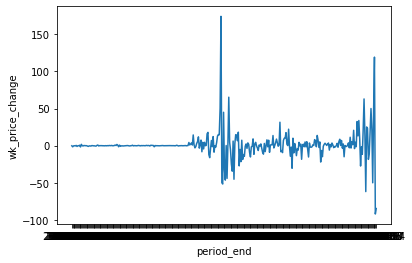

In [110]:
sns.lineplot(data=ltc_series_sorted, x="period_end", y="wk_price_change")

Observation About Weekly Price Change Target Variable
--
From the line plot above, I can see that there were periods where the price change was very significant. I imagine that the first major outlier spike refers to the performance of the asset in 2017, when Bitcoin hit $20,000 USD per coin for the first time. The other major spike outliers (which are at the end of the time period) could be related to the overall growth of the crypto market in general, but this is not clear. 

Nevertheless, my takeaway from this observation is that it may benefit me to scale the target variable.

<AxesSubplot:xlabel='period_end', ylabel='Price_Close'>

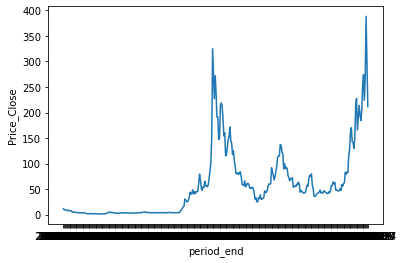

In [111]:
sns.lineplot(data=ltc_series_sorted, x="period_end", y="Price_Close")

In [112]:
df_testr

,headline,date,v2_headline
0,BTC Price Index and Live Chart -- CoinDesk 20,2021-05-26,btc price index live chart coindesk
1,"CoinDesk: Bitcoin, Ethereum, Crypto News and P...",2021-05-26,crypto news price data
2,Bitcoin Outflow From Exchanges Suggests Confid...,2021-05-26,bitcoin outflow exchanges suggests confidence ...
3,BTC Price Index and Live Chart -- CoinDesk 20,2021-05-26,btc price index live chart coindesk
4,Hedge Fund Billionaire Ray Dalio: 'I Have Some...,2021-05-24,hedge fund billionaire ray
...,...,...,...
870,"Enjin Airdrops 50,000 NFTs via Social Media QR...",2021-05-26,enjin airdrops nfts via social media qr adverts
871,Carl Icahn Archives,2021-05-01,carl icahn archives
872,arbitrum Archives,2021-05-01,arbitrum archives
873,Kevin O'Leary Archives,2021-05-01,kevin archives


In [113]:
df_testr2 = df_testr.sort_values(by=['date'])

In [114]:
df_testr2

,headline,date,v2_headline
63,How Does Bitcoin Work? Here's a Simple Explana...,2014-01-09,bitcoin simple explanation
267,3 Altcoins That Have Potential To Be The Next ...,2017-07-03,altcoins potential next ethereum bitcoin
410,Bitcoin fan who held up sign during Yellen's t...,2017-07-13,bitcoin fan held sign testimony receives effort
269,Bitcoin Fan Holds Up Sign During Yellen's Test...,2017-10-31,bitcoin fan holds sign receives donations effort
358,Bitcoin mining USB devices on a large USB hub.,2017-11-01,bitcoin mining usb devices large usb
...,...,...,...
51,"Bitcoin News Roundup for May 27, 2021",2021-05-26,bitcoin news roundup may
50,Bitcoin Price: Still Room to Fall?,2021-05-26,bitcoin still room
49,MicroStrategy's Saylor Details Meeting Where B...,2021-05-26,saylor details meeting bitcoin mining council ...
76,Why China's Crackdown May Make Bitcoin Mining ...,2021-05-26,crackdown may make bitcoin mining centralized


In [329]:
# If date of publication is within the range of a week in the crypto dataset, then that publication string
# will be added to the corresponding row in a new column in the crypto dataframe.

In [115]:
ltc_series_sorted

,Price_Open,Price_Close,wk_price_change,period_start,period_end
351,11.62433,11.43617,-0.18816,2014-06-02,2014-06-09
350,11.08000,9.51489,-1.56511,2014-06-09,2014-06-16
349,9.84337,9.54142,-0.30195,2014-06-16,2014-06-23
348,9.70001,9.60984,-0.09017,2014-06-23,2014-06-30
347,8.36573,8.00000,-0.36573,2014-06-30,2014-07-07
...,...,...,...,...,...
4,274.13000,224.13000,-50.00000,2021-04-19,2021-04-26
3,224.25000,269.10000,44.85000,2021-04-26,2021-05-03
2,269.10000,388.30000,119.20000,2021-05-03,2021-05-10
1,388.13000,296.11000,-92.02000,2021-05-10,2021-05-17


In [116]:
start_date = '2014-06-29'
test_date = '2015-06-29'

In [117]:
start_date = pd.to_datetime(start_date)

In [118]:
end_date_list = []
for d in range(7):
    
    end_date = start_date + datetime.timedelta(days=d)
    end_date_list.append(end_date)

In [119]:
end_date_list

[Timestamp('2014-06-29 00:00:00'),
 Timestamp('2014-06-30 00:00:00'),
 Timestamp('2014-07-01 00:00:00'),
 Timestamp('2014-07-02 00:00:00'),
 Timestamp('2014-07-03 00:00:00'),
 Timestamp('2014-07-04 00:00:00'),
 Timestamp('2014-07-05 00:00:00')]

In [120]:
for i in end_date_list:
    if test_date == i:
        print(start_date)
    else:
        print('naw')

naw
naw
naw
naw
naw
naw
naw


In [121]:
list_of_dates = {}

for i in ltc_series_sorted['period_start']:
    
    start_date = pd.to_datetime(i)
    the_dates = [start_date + datetime.timedelta(days=d) for d in range(7)]
    list_of_dates[start_date] = the_dates

In [122]:
list_of_dates

{Timestamp('2014-06-02 00:00:00'): [Timestamp('2014-06-02 00:00:00'),
  Timestamp('2014-06-03 00:00:00'),
  Timestamp('2014-06-04 00:00:00'),
  Timestamp('2014-06-05 00:00:00'),
  Timestamp('2014-06-06 00:00:00'),
  Timestamp('2014-06-07 00:00:00'),
  Timestamp('2014-06-08 00:00:00')],
 Timestamp('2014-06-09 00:00:00'): [Timestamp('2014-06-09 00:00:00'),
  Timestamp('2014-06-10 00:00:00'),
  Timestamp('2014-06-11 00:00:00'),
  Timestamp('2014-06-12 00:00:00'),
  Timestamp('2014-06-13 00:00:00'),
  Timestamp('2014-06-14 00:00:00'),
  Timestamp('2014-06-15 00:00:00')],
 Timestamp('2014-06-16 00:00:00'): [Timestamp('2014-06-16 00:00:00'),
  Timestamp('2014-06-17 00:00:00'),
  Timestamp('2014-06-18 00:00:00'),
  Timestamp('2014-06-19 00:00:00'),
  Timestamp('2014-06-20 00:00:00'),
  Timestamp('2014-06-21 00:00:00'),
  Timestamp('2014-06-22 00:00:00')],
 Timestamp('2014-06-23 00:00:00'): [Timestamp('2014-06-23 00:00:00'),
  Timestamp('2014-06-24 00:00:00'),
  Timestamp('2014-06-25 00:00:00'

In [123]:
list_of_dates = pd.DataFrame(list_of_dates)

In [124]:
list_of_dates = list_of_dates.T

In [125]:
list_of_dates

,0,1,2,3,4,5,6
2014-06-02,2014-06-02,2014-06-03,2014-06-04,2014-06-05,2014-06-06,2014-06-07,2014-06-08
2014-06-09,2014-06-09,2014-06-10,2014-06-11,2014-06-12,2014-06-13,2014-06-14,2014-06-15
2014-06-16,2014-06-16,2014-06-17,2014-06-18,2014-06-19,2014-06-20,2014-06-21,2014-06-22
2014-06-23,2014-06-23,2014-06-24,2014-06-25,2014-06-26,2014-06-27,2014-06-28,2014-06-29
2014-06-30,2014-06-30,2014-07-01,2014-07-02,2014-07-03,2014-07-04,2014-07-05,2014-07-06
...,...,...,...,...,...,...,...
2021-04-19,2021-04-19,2021-04-20,2021-04-21,2021-04-22,2021-04-23,2021-04-24,2021-04-25
2021-04-26,2021-04-26,2021-04-27,2021-04-28,2021-04-29,2021-04-30,2021-05-01,2021-05-02
2021-05-03,2021-05-03,2021-05-04,2021-05-05,2021-05-06,2021-05-07,2021-05-08,2021-05-09
2021-05-10,2021-05-10,2021-05-11,2021-05-12,2021-05-13,2021-05-14,2021-05-15,2021-05-16


In [126]:
list_of_dates = list_of_dates.rename(columns={0: 'included_dates'})

In [127]:
list_of_dates

,included_dates,1,2,3,4,5,6
2014-06-02,2014-06-02,2014-06-03,2014-06-04,2014-06-05,2014-06-06,2014-06-07,2014-06-08
2014-06-09,2014-06-09,2014-06-10,2014-06-11,2014-06-12,2014-06-13,2014-06-14,2014-06-15
2014-06-16,2014-06-16,2014-06-17,2014-06-18,2014-06-19,2014-06-20,2014-06-21,2014-06-22
2014-06-23,2014-06-23,2014-06-24,2014-06-25,2014-06-26,2014-06-27,2014-06-28,2014-06-29
2014-06-30,2014-06-30,2014-07-01,2014-07-02,2014-07-03,2014-07-04,2014-07-05,2014-07-06
...,...,...,...,...,...,...,...
2021-04-19,2021-04-19,2021-04-20,2021-04-21,2021-04-22,2021-04-23,2021-04-24,2021-04-25
2021-04-26,2021-04-26,2021-04-27,2021-04-28,2021-04-29,2021-04-30,2021-05-01,2021-05-02
2021-05-03,2021-05-03,2021-05-04,2021-05-05,2021-05-06,2021-05-07,2021-05-08,2021-05-09
2021-05-10,2021-05-10,2021-05-11,2021-05-12,2021-05-13,2021-05-14,2021-05-15,2021-05-16


In [128]:
list_of_dates = list_of_dates.rename(columns={1: 'included_dates1'})
list_of_dates = list_of_dates.rename(columns={2: 'included_dates2'})
list_of_dates = list_of_dates.rename(columns={3: 'included_dates3'})
list_of_dates = list_of_dates.rename(columns={4: 'included_dates4'})
list_of_dates = list_of_dates.rename(columns={5: 'included_dates5'})
list_of_dates = list_of_dates.rename(columns={6: 'included_dates6'})

In [129]:
list_of_dates

,included_dates,included_dates1,included_dates2,included_dates3,included_dates4,included_dates5,included_dates6
2014-06-02,2014-06-02,2014-06-03,2014-06-04,2014-06-05,2014-06-06,2014-06-07,2014-06-08
2014-06-09,2014-06-09,2014-06-10,2014-06-11,2014-06-12,2014-06-13,2014-06-14,2014-06-15
2014-06-16,2014-06-16,2014-06-17,2014-06-18,2014-06-19,2014-06-20,2014-06-21,2014-06-22
2014-06-23,2014-06-23,2014-06-24,2014-06-25,2014-06-26,2014-06-27,2014-06-28,2014-06-29
2014-06-30,2014-06-30,2014-07-01,2014-07-02,2014-07-03,2014-07-04,2014-07-05,2014-07-06
...,...,...,...,...,...,...,...
2021-04-19,2021-04-19,2021-04-20,2021-04-21,2021-04-22,2021-04-23,2021-04-24,2021-04-25
2021-04-26,2021-04-26,2021-04-27,2021-04-28,2021-04-29,2021-04-30,2021-05-01,2021-05-02
2021-05-03,2021-05-03,2021-05-04,2021-05-05,2021-05-06,2021-05-07,2021-05-08,2021-05-09
2021-05-10,2021-05-10,2021-05-11,2021-05-12,2021-05-13,2021-05-14,2021-05-15,2021-05-16


In [130]:
list_of_dates = list_of_dates.assign (all_dates = + list_of_dates.included_dates.astype(str) + ', ' 
                                     + list_of_dates.included_dates1.astype(str) + ', ' 
                                     + list_of_dates.included_dates2.astype(str) + ', '
                                     + list_of_dates.included_dates3.astype(str) + ', '
                                     + list_of_dates.included_dates4.astype(str) + ', '
                                     + list_of_dates.included_dates5.astype(str) + ', '
                                      + list_of_dates.included_dates6.astype(str))

In [131]:
list_of_dates

,included_dates,included_dates1,included_dates2,included_dates3,included_dates4,included_dates5,included_dates6,all_dates
2014-06-02,2014-06-02,2014-06-03,2014-06-04,2014-06-05,2014-06-06,2014-06-07,2014-06-08,"2014-06-02, 2014-06-03, 2014-06-04, 2014-06-05..."
2014-06-09,2014-06-09,2014-06-10,2014-06-11,2014-06-12,2014-06-13,2014-06-14,2014-06-15,"2014-06-09, 2014-06-10, 2014-06-11, 2014-06-12..."
2014-06-16,2014-06-16,2014-06-17,2014-06-18,2014-06-19,2014-06-20,2014-06-21,2014-06-22,"2014-06-16, 2014-06-17, 2014-06-18, 2014-06-19..."
2014-06-23,2014-06-23,2014-06-24,2014-06-25,2014-06-26,2014-06-27,2014-06-28,2014-06-29,"2014-06-23, 2014-06-24, 2014-06-25, 2014-06-26..."
2014-06-30,2014-06-30,2014-07-01,2014-07-02,2014-07-03,2014-07-04,2014-07-05,2014-07-06,"2014-06-30, 2014-07-01, 2014-07-02, 2014-07-03..."
...,...,...,...,...,...,...,...,...
2021-04-19,2021-04-19,2021-04-20,2021-04-21,2021-04-22,2021-04-23,2021-04-24,2021-04-25,"2021-04-19, 2021-04-20, 2021-04-21, 2021-04-22..."
2021-04-26,2021-04-26,2021-04-27,2021-04-28,2021-04-29,2021-04-30,2021-05-01,2021-05-02,"2021-04-26, 2021-04-27, 2021-04-28, 2021-04-29..."
2021-05-03,2021-05-03,2021-05-04,2021-05-05,2021-05-06,2021-05-07,2021-05-08,2021-05-09,"2021-05-03, 2021-05-04, 2021-05-05, 2021-05-06..."
2021-05-10,2021-05-10,2021-05-11,2021-05-12,2021-05-13,2021-05-14,2021-05-15,2021-05-16,"2021-05-10, 2021-05-11, 2021-05-12, 2021-05-13..."


In [132]:
list_of_dates = list_of_dates.drop(['included_dates', 'included_dates1', 'included_dates2',
                                            'included_dates3', 'included_dates4', 'included_dates5', 'included_dates6'],
                                   axis=1)

In [133]:
list_of_dates

,all_dates
2014-06-02,"2014-06-02, 2014-06-03, 2014-06-04, 2014-06-05..."
2014-06-09,"2014-06-09, 2014-06-10, 2014-06-11, 2014-06-12..."
2014-06-16,"2014-06-16, 2014-06-17, 2014-06-18, 2014-06-19..."
2014-06-23,"2014-06-23, 2014-06-24, 2014-06-25, 2014-06-26..."
2014-06-30,"2014-06-30, 2014-07-01, 2014-07-02, 2014-07-03..."
...,...
2021-04-19,"2021-04-19, 2021-04-20, 2021-04-21, 2021-04-22..."
2021-04-26,"2021-04-26, 2021-04-27, 2021-04-28, 2021-04-29..."
2021-05-03,"2021-05-03, 2021-05-04, 2021-05-05, 2021-05-06..."
2021-05-10,"2021-05-10, 2021-05-11, 2021-05-12, 2021-05-13..."


In [134]:
list_of_dates = list_of_dates.reset_index()

In [135]:
list_of_dates

,index,all_dates
0,2014-06-02,"2014-06-02, 2014-06-03, 2014-06-04, 2014-06-05..."
1,2014-06-09,"2014-06-09, 2014-06-10, 2014-06-11, 2014-06-12..."
2,2014-06-16,"2014-06-16, 2014-06-17, 2014-06-18, 2014-06-19..."
3,2014-06-23,"2014-06-23, 2014-06-24, 2014-06-25, 2014-06-26..."
4,2014-06-30,"2014-06-30, 2014-07-01, 2014-07-02, 2014-07-03..."
...,...,...
347,2021-04-19,"2021-04-19, 2021-04-20, 2021-04-21, 2021-04-22..."
348,2021-04-26,"2021-04-26, 2021-04-27, 2021-04-28, 2021-04-29..."
349,2021-05-03,"2021-05-03, 2021-05-04, 2021-05-05, 2021-05-06..."
350,2021-05-10,"2021-05-10, 2021-05-11, 2021-05-12, 2021-05-13..."


In [136]:
len(list_of_dates)

352

In [137]:
ltc_series_sorted

,Price_Open,Price_Close,wk_price_change,period_start,period_end
351,11.62433,11.43617,-0.18816,2014-06-02,2014-06-09
350,11.08000,9.51489,-1.56511,2014-06-09,2014-06-16
349,9.84337,9.54142,-0.30195,2014-06-16,2014-06-23
348,9.70001,9.60984,-0.09017,2014-06-23,2014-06-30
347,8.36573,8.00000,-0.36573,2014-06-30,2014-07-07
...,...,...,...,...,...
4,274.13000,224.13000,-50.00000,2021-04-19,2021-04-26
3,224.25000,269.10000,44.85000,2021-04-26,2021-05-03
2,269.10000,388.30000,119.20000,2021-05-03,2021-05-10
1,388.13000,296.11000,-92.02000,2021-05-10,2021-05-17


In [138]:
len(ltc_series_sorted)

352

In [140]:
ltc_series_sorted

,Price_Open,Price_Close,wk_price_change,period_start,period_end
351,11.62433,11.43617,-0.18816,2014-06-02,2014-06-09
350,11.08000,9.51489,-1.56511,2014-06-09,2014-06-16
349,9.84337,9.54142,-0.30195,2014-06-16,2014-06-23
348,9.70001,9.60984,-0.09017,2014-06-23,2014-06-30
347,8.36573,8.00000,-0.36573,2014-06-30,2014-07-07
...,...,...,...,...,...
4,274.13000,224.13000,-50.00000,2021-04-19,2021-04-26
3,224.25000,269.10000,44.85000,2021-04-26,2021-05-03
2,269.10000,388.30000,119.20000,2021-05-03,2021-05-10
1,388.13000,296.11000,-92.02000,2021-05-10,2021-05-17


In [141]:
list_of_dates

,index,all_dates
0,2014-06-02,"2014-06-02, 2014-06-03, 2014-06-04, 2014-06-05..."
1,2014-06-09,"2014-06-09, 2014-06-10, 2014-06-11, 2014-06-12..."
2,2014-06-16,"2014-06-16, 2014-06-17, 2014-06-18, 2014-06-19..."
3,2014-06-23,"2014-06-23, 2014-06-24, 2014-06-25, 2014-06-26..."
4,2014-06-30,"2014-06-30, 2014-07-01, 2014-07-02, 2014-07-03..."
...,...,...
347,2021-04-19,"2021-04-19, 2021-04-20, 2021-04-21, 2021-04-22..."
348,2021-04-26,"2021-04-26, 2021-04-27, 2021-04-28, 2021-04-29..."
349,2021-05-03,"2021-05-03, 2021-05-04, 2021-05-05, 2021-05-06..."
350,2021-05-10,"2021-05-10, 2021-05-11, 2021-05-12, 2021-05-13..."


In [ ]:
# Using date from the headline DF

# If the headline date is in the collection of dates in the same row as the headline

# The headline will be added to a list or dictionary on the litecoin price df, in accordance with the proper week

In [142]:
ltc_df = pd.merge(ltc_series_sorted, list_of_dates, left_index = True, right_index = True, how='outer')

In [143]:
ltc_df

,Price_Open,Price_Close,wk_price_change,period_start,period_end,index,all_dates
0,296.19000,211.55000,-84.64000,2021-05-17,2021-05-24,2014-06-02,"2014-06-02, 2014-06-03, 2014-06-04, 2014-06-05..."
1,388.13000,296.11000,-92.02000,2021-05-10,2021-05-17,2014-06-09,"2014-06-09, 2014-06-10, 2014-06-11, 2014-06-12..."
2,269.10000,388.30000,119.20000,2021-05-03,2021-05-10,2014-06-16,"2014-06-16, 2014-06-17, 2014-06-18, 2014-06-19..."
3,224.25000,269.10000,44.85000,2021-04-26,2021-05-03,2014-06-23,"2014-06-23, 2014-06-24, 2014-06-25, 2014-06-26..."
4,274.13000,224.13000,-50.00000,2021-04-19,2021-04-26,2014-06-30,"2014-06-30, 2014-07-01, 2014-07-02, 2014-07-03..."
...,...,...,...,...,...,...,...
347,8.36573,8.00000,-0.36573,2014-06-30,2014-07-07,2021-04-19,"2021-04-19, 2021-04-20, 2021-04-21, 2021-04-22..."
348,9.70001,9.60984,-0.09017,2014-06-23,2014-06-30,2021-04-26,"2021-04-26, 2021-04-27, 2021-04-28, 2021-04-29..."
349,9.84337,9.54142,-0.30195,2014-06-16,2014-06-23,2021-05-03,"2021-05-03, 2021-05-04, 2021-05-05, 2021-05-06..."
350,11.08000,9.51489,-1.56511,2014-06-09,2014-06-16,2021-05-10,"2021-05-10, 2021-05-11, 2021-05-12, 2021-05-13..."


In [144]:
df_testr2['date'] = pd.to_datetime(df_testr2['date'])

In [145]:
df_testr2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 875 entries, 63 to 0
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   headline     875 non-null    object        
 1   date         875 non-null    datetime64[ns]
 2   v2_headline  875 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 27.3+ KB


In [146]:
list_of_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   index      352 non-null    datetime64[ns]
 1   all_dates  352 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 5.6+ KB


In [147]:
df_testr2

,headline,date,v2_headline
63,How Does Bitcoin Work? Here's a Simple Explana...,2014-01-09,bitcoin simple explanation
267,3 Altcoins That Have Potential To Be The Next ...,2017-07-03,altcoins potential next ethereum bitcoin
410,Bitcoin fan who held up sign during Yellen's t...,2017-07-13,bitcoin fan held sign testimony receives effort
269,Bitcoin Fan Holds Up Sign During Yellen's Test...,2017-10-31,bitcoin fan holds sign receives donations effort
358,Bitcoin mining USB devices on a large USB hub.,2017-11-01,bitcoin mining usb devices large usb
...,...,...,...
51,"Bitcoin News Roundup for May 27, 2021",2021-05-26,bitcoin news roundup may
50,Bitcoin Price: Still Room to Fall?,2021-05-26,bitcoin still room
49,MicroStrategy's Saylor Details Meeting Where B...,2021-05-26,saylor details meeting bitcoin mining council ...
76,Why China's Crackdown May Make Bitcoin Mining ...,2021-05-26,crackdown may make bitcoin mining centralized


In [148]:
list_of_dates

,index,all_dates
0,2014-06-02,"2014-06-02, 2014-06-03, 2014-06-04, 2014-06-05..."
1,2014-06-09,"2014-06-09, 2014-06-10, 2014-06-11, 2014-06-12..."
2,2014-06-16,"2014-06-16, 2014-06-17, 2014-06-18, 2014-06-19..."
3,2014-06-23,"2014-06-23, 2014-06-24, 2014-06-25, 2014-06-26..."
4,2014-06-30,"2014-06-30, 2014-07-01, 2014-07-02, 2014-07-03..."
...,...,...
347,2021-04-19,"2021-04-19, 2021-04-20, 2021-04-21, 2021-04-22..."
348,2021-04-26,"2021-04-26, 2021-04-27, 2021-04-28, 2021-04-29..."
349,2021-05-03,"2021-05-03, 2021-05-04, 2021-05-05, 2021-05-06..."
350,2021-05-10,"2021-05-10, 2021-05-11, 2021-05-12, 2021-05-13..."


Better Method For Getting The Column I Need:
--
I needed to find a way align each headline with the corresponding week in which it fell. I was able to achieve this with the below approach.

In [161]:
import datetime
today = datetime.date.today()
last_monday = today - datetime.timedelta(days=today.weekday())

In [162]:
today

datetime.date(2021, 5, 27)

In [150]:
last_monday

datetime.date(2021, 5, 24)

In [151]:
df_testr2['date']

63    2014-01-09
267   2017-07-03
410   2017-07-13
269   2017-10-31
358   2017-11-01
         ...    
51    2021-05-26
50    2021-05-26
49    2021-05-26
76    2021-05-26
0     2021-05-26
Name: date, Length: 875, dtype: datetime64[ns]

In [152]:
def last_mon(date):
    
    return date - datetime.timedelta(days=date.weekday())

In [153]:
df_testr2['date'].apply(lambda x: last_mon(x))

63    2014-01-06
267   2017-07-03
410   2017-07-10
269   2017-10-30
358   2017-10-30
         ...    
51    2021-05-24
50    2021-05-24
49    2021-05-24
76    2021-05-24
0     2021-05-24
Name: date, Length: 875, dtype: datetime64[ns]

In [154]:
df_testr2['mondays'] = df_testr2['date'].apply(lambda x: last_mon(x))

In [155]:
df_testr2

,headline,date,v2_headline,mondays
63,How Does Bitcoin Work? Here's a Simple Explana...,2014-01-09,bitcoin simple explanation,2014-01-06
267,3 Altcoins That Have Potential To Be The Next ...,2017-07-03,altcoins potential next ethereum bitcoin,2017-07-03
410,Bitcoin fan who held up sign during Yellen's t...,2017-07-13,bitcoin fan held sign testimony receives effort,2017-07-10
269,Bitcoin Fan Holds Up Sign During Yellen's Test...,2017-10-31,bitcoin fan holds sign receives donations effort,2017-10-30
358,Bitcoin mining USB devices on a large USB hub.,2017-11-01,bitcoin mining usb devices large usb,2017-10-30
...,...,...,...,...
51,"Bitcoin News Roundup for May 27, 2021",2021-05-26,bitcoin news roundup may,2021-05-24
50,Bitcoin Price: Still Room to Fall?,2021-05-26,bitcoin still room,2021-05-24
49,MicroStrategy's Saylor Details Meeting Where B...,2021-05-26,saylor details meeting bitcoin mining council ...,2021-05-24
76,Why China's Crackdown May Make Bitcoin Mining ...,2021-05-26,crackdown may make bitcoin mining centralized,2021-05-24


In [156]:
df_testr2 = df_testr2.reset_index()

In [158]:
df_testr2 = df_testr2.drop(columns ='index')

In [159]:
df_testr2

,headline,date,v2_headline,mondays
0,How Does Bitcoin Work? Here's a Simple Explana...,2014-01-09,bitcoin simple explanation,2014-01-06
1,3 Altcoins That Have Potential To Be The Next ...,2017-07-03,altcoins potential next ethereum bitcoin,2017-07-03
2,Bitcoin fan who held up sign during Yellen's t...,2017-07-13,bitcoin fan held sign testimony receives effort,2017-07-10
3,Bitcoin Fan Holds Up Sign During Yellen's Test...,2017-10-31,bitcoin fan holds sign receives donations effort,2017-10-30
4,Bitcoin mining USB devices on a large USB hub.,2017-11-01,bitcoin mining usb devices large usb,2017-10-30
...,...,...,...,...
870,"Bitcoin News Roundup for May 27, 2021",2021-05-26,bitcoin news roundup may,2021-05-24
871,Bitcoin Price: Still Room to Fall?,2021-05-26,bitcoin still room,2021-05-24
872,MicroStrategy's Saylor Details Meeting Where B...,2021-05-26,saylor details meeting bitcoin mining council ...,2021-05-24
873,Why China's Crackdown May Make Bitcoin Mining ...,2021-05-26,crackdown may make bitcoin mining centralized,2021-05-24


Changing Column Name:
--

"Period_Start" describes the period in which that headline falls. This way, I can join the dataframes according to this date.

In [167]:
df_testr2 = df_testr2.rename(columns={'mondays': 'period_start'})

In [168]:
df_testr2

,headline,date,v2_headline,period_start
0,How Does Bitcoin Work? Here's a Simple Explana...,2014-01-09,bitcoin simple explanation,2014-01-06
1,3 Altcoins That Have Potential To Be The Next ...,2017-07-03,altcoins potential next ethereum bitcoin,2017-07-03
2,Bitcoin fan who held up sign during Yellen's t...,2017-07-13,bitcoin fan held sign testimony receives effort,2017-07-10
3,Bitcoin Fan Holds Up Sign During Yellen's Test...,2017-10-31,bitcoin fan holds sign receives donations effort,2017-10-30
4,Bitcoin mining USB devices on a large USB hub.,2017-11-01,bitcoin mining usb devices large usb,2017-10-30
...,...,...,...,...
870,"Bitcoin News Roundup for May 27, 2021",2021-05-26,bitcoin news roundup may,2021-05-24
871,Bitcoin Price: Still Room to Fall?,2021-05-26,bitcoin still room,2021-05-24
872,MicroStrategy's Saylor Details Meeting Where B...,2021-05-26,saylor details meeting bitcoin mining council ...,2021-05-24
873,Why China's Crackdown May Make Bitcoin Mining ...,2021-05-26,crackdown may make bitcoin mining centralized,2021-05-24


In [177]:
ltc_series_sorted['period_start'] = pd.to_datetime(ltc_series_sorted['period_start'])

In [208]:
df333 = pd.merge(df_testr2, ltc_series_sorted, left_index = False, right_index = False)

In [209]:
df333

,headline,date,v2_headline,period_start,Price_Open,Price_Close,wk_price_change,period_end
0,3 Altcoins That Have Potential To Be The Next ...,2017-07-03,altcoins potential next ethereum bitcoin,2017-07-03,41.23703,48.76000,7.52297,2017-07-10
1,Bitcoin fan who held up sign during Yellen's t...,2017-07-13,bitcoin fan held sign testimony receives effort,2017-07-10,48.76000,40.53231,-8.22769,2017-07-17
2,Bitcoin Fan Holds Up Sign During Yellen's Test...,2017-10-31,bitcoin fan holds sign receives donations effort,2017-10-30,56.59000,54.67000,-1.92000,2017-11-06
3,Bitcoin mining USB devices on a large USB hub.,2017-11-01,bitcoin mining usb devices large usb,2017-10-30,56.59000,54.67000,-1.92000,2017-11-06
4,Word blockchain made of Bitcoin signs. 3D illu...,2017-11-01,word blockchain made bitcoin illustration,2017-10-30,56.59000,54.67000,-1.92000,2017-11-06
...,...,...,...,...,...,...,...,...
775,Cardano Close to Launching Smart Contracts: Ch...,2021-05-22,cardano close launching smart charles hoskinson,2021-05-17,296.19000,211.55000,-84.64000,2021-05-24
776,Blockstream Buys Demeester's Adamant in Expans...,2021-05-22,blockstream buys adamant expansion bitcoin inv...,2021-05-17,296.19000,211.55000,-84.64000,2021-05-24
777,Huobi Scales Back Due to China Crackdown; Bitc...,2021-05-23,huobi scales back due china bitcoin falls ethe...,2021-05-17,296.19000,211.55000,-84.64000,2021-05-24
778,"Bitcoin, Ether Now Down 50% From Last Month's ...",2021-05-23,ether last ath rout resumes,2021-05-17,296.19000,211.55000,-84.64000,2021-05-24


In [222]:
# def up_down(price_changes):
    
#     for i in range(len(price_changes)):
        
#         if price_changes[i] > 0:
#             return 'up'
#         elif price_changes[i] < 0:
#             return 'down'
#         else:
#             return 'stays'

Getting The Categorical Variable:
--

Up vs. Down >>> For the target variable

In [220]:
df333['price_direction'] = df333['wk_price_change'].apply(lambda x: 'up' if x>0 else 'down')

In [221]:
df333

,headline,date,v2_headline,period_start,Price_Open,Price_Close,wk_price_change,period_end,price_direction
0,3 Altcoins That Have Potential To Be The Next ...,2017-07-03,altcoins potential next ethereum bitcoin,2017-07-03,41.23703,48.76000,7.52297,2017-07-10,up
1,Bitcoin fan who held up sign during Yellen's t...,2017-07-13,bitcoin fan held sign testimony receives effort,2017-07-10,48.76000,40.53231,-8.22769,2017-07-17,down
2,Bitcoin Fan Holds Up Sign During Yellen's Test...,2017-10-31,bitcoin fan holds sign receives donations effort,2017-10-30,56.59000,54.67000,-1.92,2017-11-06,down
3,Bitcoin mining USB devices on a large USB hub.,2017-11-01,bitcoin mining usb devices large usb,2017-10-30,56.59000,54.67000,-1.92,2017-11-06,down
4,Word blockchain made of Bitcoin signs. 3D illu...,2017-11-01,word blockchain made bitcoin illustration,2017-10-30,56.59000,54.67000,-1.92,2017-11-06,down
...,...,...,...,...,...,...,...,...,...
775,Cardano Close to Launching Smart Contracts: Ch...,2021-05-22,cardano close launching smart charles hoskinson,2021-05-17,296.19000,211.55000,-84.64,2021-05-24,down
776,Blockstream Buys Demeester's Adamant in Expans...,2021-05-22,blockstream buys adamant expansion bitcoin inv...,2021-05-17,296.19000,211.55000,-84.64,2021-05-24,down
777,Huobi Scales Back Due to China Crackdown; Bitc...,2021-05-23,huobi scales back due china bitcoin falls ethe...,2021-05-17,296.19000,211.55000,-84.64,2021-05-24,down
778,"Bitcoin, Ether Now Down 50% From Last Month's ...",2021-05-23,ether last ath rout resumes,2021-05-17,296.19000,211.55000,-84.64,2021-05-24,down


In [225]:
df_ready = df333.drop(['headline','date','Price_Open','Price_Close','wk_price_change','period_end'],
                     axis=1)

In [226]:
df_ready

,v2_headline,period_start,price_direction
0,altcoins potential next ethereum bitcoin,2017-07-03,up
1,bitcoin fan held sign testimony receives effort,2017-07-10,down
2,bitcoin fan holds sign receives donations effort,2017-10-30,down
3,bitcoin mining usb devices large usb,2017-10-30,down
4,word blockchain made bitcoin illustration,2017-10-30,down
...,...,...,...
775,cardano close launching smart charles hoskinson,2021-05-17,down
776,blockstream buys adamant expansion bitcoin inv...,2021-05-17,down
777,huobi scales back due china bitcoin falls ethe...,2021-05-17,down
778,ether last ath rout resumes,2021-05-17,down


In [235]:
df_ready['price_direction'].value_counts()

up      399
down    381
Name: price_direction, dtype: int64

In [236]:
df_ready.to_csv(r'C:\Users\samsung\data-science-journey\Course Materials\Capstone\crypto-headlines-as-predictors\df_ready.csv'
               , index = False)

Ready For Modeling:
--
At this point, I've got the following done:

- Processed crypto headlines to serve as the feature
- Created classification target variable based on weekly price change for LTC

Now, I'm ready to do some modeling on this data, to determine whether crypto headlines can be used to predict the price direction of a crypto asset.

Some key elements to this that are worth mentioning:

- The search word "Bitcoin" is not the same as the asset being analyzed (Litecoin) as I chose to investigate whether news where Bitcoin was mentioned had an impact on another asset. This has been the case in the market oftentimes.
- Litecoin is one of the oldest cryptocurrencies and benefits from much of the same "time in market" as Bitcoin
- Many headlines are not specifically Bitcoin or Litecoin related, but for this iteration, I see this as fine.